# Performance analysis
In this notebook we will run some checks to keep track of our 20Q player's performance.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('gameplay_stats.csv')

## Overall performance

### Extracting useful information

In [57]:
#total number of games
total = df.shape[0]

results = df['result'].value_counts()

#total number of wins
tot_wins = results[0]

#total number of losses
tot_losses = results[1]+results[2]

#total number of losses type 1 ==> guess already in knowledge base
tot_ones = results[1]

#total number of losses type 2 ==> guess not yet in knowledge base
tot_twos = results[2]

#average number of questions asked for wins
avg_q_win = df[df['result'] == 0]['n_questions'].mean()

#sequences of n_questions for wins
wins_seq = np.asarray(df[df['result'] == 0]['n_questions'])

#sequence of results
results_seq = np.asarray(df['result'])
results_bin_seq = []
for i, e in enumerate(results_seq):
    if e != 0:
        results_bin_seq.append(0)
    else:
        results_bin_seq.append(1)
        
evolution = [np.sum(results_bin_seq[:i+1])/(i+1) for i in range(len(results_bin_seq))]

#seq losses
losses_seq = np.asarray(df[df['result'] != 0]['result'])

### Plots

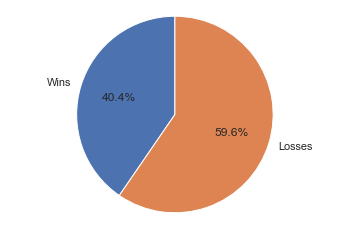

In [64]:
#Wins / losses
labels = 'Wins', 'Losses'
sizes = [tot_wins*100/total, tot_losses*100/total ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie-winsLosses.pdf', dpi=199)
plt.show()

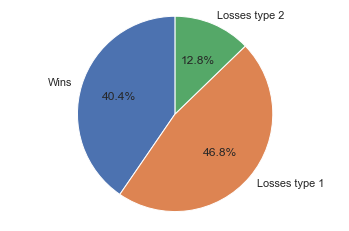

In [65]:
#Wins / losses
labels = 'Wins', 'Losses type 1', 'Losses type 2'
sizes = [tot_wins*100/total, tot_ones*100/total, tot_twos*100/total ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_detailed-winsLosses.pdf', dpi=199)
plt.show()

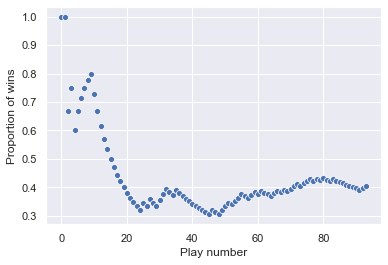

In [59]:
#Evolution of results
sns.scatterplot(x=range(len(results_seq)), y=evolution)

plt.xlabel('Play number')
plt.ylabel('Proportion of wins')

plt.savefig('stats-eval.pdf', dpi=199)